In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
df = pd.read_parquet(r'/content/drive/MyDrive/Norvartis Datathon/train_data.parquet')

In [3]:
# Add "Unknown" category to 'main_channel' and "U" to 'ther_area'
df['main_channel'] = df['main_channel'].cat.add_categories("Unknown")
df['ther_area'] = df['ther_area'].cat.add_categories("U")

# Fill missing values with "Unknown" for 'main_channel' and "U" for 'ther_area'
df['main_channel'].fillna("Unknown", inplace=True)
df['ther_area'].fillna("U", inplace=True)

# Fill missing values with 0 for 'hospital_rate'
df['hospital_rate'].fillna(0, inplace=True)

# Create a new column 'year' extracting the year from the 'date' column
df['year'] = df['date'].dt.year

# Create lag columns for 'wd_perc' (assuming this is the column you want to lag)
df['lag_1'] = df['wd_perc'].shift(1).fillna(0)
df['lag_2'] = df['wd_perc'].shift(2).fillna(0)
df['lag_3'] = df['wd_perc'].shift(3).fillna(0)

# Display concise information about the DataFrame, including data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2812490 entries, 0 to 3525881
Data columns (total 24 columns):
 #   Column         Dtype         
---  ------         -----         
 0   brand          object        
 1   phase          float64       
 2   country        object        
 3   dayweek        float64       
 4   month          float64       
 5   wd_perc        float64       
 6   ther_area      category      
 7   hospital_rate  float64       
 8   n_nwd_bef      float64       
 9   n_nwd_aft      float64       
 10  n_weekday_0    int64         
 11  n_weekday_1    int64         
 12  n_weekday_2    int64         
 13  n_weekday_3    int64         
 14  n_weekday_4    int64         
 15  date           datetime64[ns]
 16  wd             int64         
 17  wd_left        int64         
 18  monthly        float64       
 19  main_channel   category      
 20  year           int64         
 21  lag_1          float64       
 22  lag_2          float64       
 23  lag_3  

In [4]:
# Create a pivot table
pivot_table = pd.pivot_table(df, values='monthly', index=['country', 'brand'], aggfunc=np.mean)
pivot_table.reset_index(inplace=True)

# print(pivot_table.info())
pivot = pivot_table.sort_values('monthly', ascending=False)

# Initialize an empty list to store the top rows for each country
top_rows = []

# Loop through unique countries in the pivot df
for country in pivot["country"].unique():
    # Select the top row for the current country
    top_row = pivot[pivot["country"] == country].iloc[[0], :]

    # Append the top row to the list
    top_rows.append(top_row)

# Concatenate the list of top rows into a new DataFrame
top_brands_in_country = pd.concat(top_rows)

# Display the resulting DataFrame
print(top_brands_in_country)

# Create an array with brands and countries
brands_and_countries_array = top_brands_in_country[['brand', 'country']].values

# Create different DataFrames based on brand and country combinations
filtered_dfs = {}
for brand, country in brands_and_countries_array:
    filtered_df_name = f"df_{brand}_{country}"
    filtered_df = df[(df['brand'] == brand) & (df['country'] == country)].copy()
    filtered_dfs[filtered_df_name] = filtered_df
    filtered_df.drop(["brand", "country", "monthly", "ther_area", "hospital_rate", "main_channel"], axis=1, inplace=True)

# Check some of the resulting DataFrames
from itertools import islice
for name, filtered_df in islice(filtered_dfs.items(), 5):
    print(f"\nDataFrame {name}:")
    display(filtered_df.head(1))

         country  brand   monthly
233      Arrakis  KGUIR  0.661624
1486    Hogwarts  TFRIZ  0.304923
1802       Panem  TFRIZ  0.293664
1151     Fangorn  WUOIM  0.282321
589      Braavos  GUCEF  0.246270
1684      Narnia  TFRIZ  0.224915
2507    Westeros  ZKMVW  0.192817
66       Aldovia  PJZBL  0.182509
2178  Themyscira  NXPMK  0.155435
1369      Gondor  PJZBL  0.152828
2041       Qarth  ZKMVW  0.145064
174    Arendelle  UYELK  0.124232
944      Eriador  PLNDT  0.117491
1243   Gallifrey  EUJWP  0.115673
1610    Latveria  ZKMVW  0.109175
1876     Prydain  NXPMK  0.108241
364       Asgard  TFRIZ  0.104176
753        Dorne  DKCQN  0.101273
510      Beleria  JJVUD  0.100706
2609     Zamunda  EUJWP  0.099820
1080     Etheria  NXPMK  0.091833
2396     Wakanda  ZKMVW  0.089270
2268      Vulcan  PJZBL  0.087660
702    Coruscant  NXPMK  0.084370
1061       Essos  ZKMVW  0.082932
1175    Ferelden  GUCEF  0.080611
2584      Yunkai  ZKMVW  0.080047
827      Elbonia  EAHGQ  0.076587
424     Atlant

,phase,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,year,lag_1,lag_2,lag_3
311587,0.0,4.0,5.0,0.05,0.0,2.0,3,4,4,4,5,2015-05-01,1,19,2015,1.0,0.954545,0.909091



DataFrame df_TFRIZ_Hogwarts:


,phase,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,year,lag_1,lag_2,lag_3
1937803,0.038643,0.0,9.0,0.045455,2.0,0.0,5,5,4,4,4,2014-09-01,1,21,2014,1.0,0.956522,0.913043



DataFrame df_TFRIZ_Panem:


,phase,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,year,lag_1,lag_2,lag_3
2384413,0.057106,0.0,9.0,0.05,4.0,0.0,8,8,8,8,8,2018-09-03,1,19,2018,1.0,0.941176,0.882353



DataFrame df_WUOIM_Fangorn:


,phase,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,year,lag_1,lag_2,lag_3
1516541,0.059351,4.0,1.0,0.05,3.0,2.0,4,4,4,4,4,2013-01-04,1,19,2013,1.0,0.956522,0.913043



DataFrame df_GUCEF_Braavos:


,phase,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,date,wd,wd_left,year,lag_1,lag_2,lag_3
799640,0.161867,4.0,2.0,0.055556,1.0,2.0,3,4,4,3,4,2013-02-01,1,17,2013,1.0,0.947368,0.894737


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd

# Convertir los valores del diccionario en una lista
dfs_list = list(filtered_dfs.values())

# Initialize an empty DataFrame to store feature importances
importance_aggregate_df = pd.DataFrame(columns=['Feature'])

# Iterate through all created dataframes and extract the feature importance they have on a random forest model
for i, top_df in enumerate(dfs_list):
    # Select features and target for each model
    X = top_df.drop('phase', axis=1)
    y = top_df['phase']

    # Define numerical and categorical features
    numerical_features = X.select_dtypes(include=['float64', 'int64']).columns
    categorical_features = X.select_dtypes(include=['category']).columns

    # Combine transformers into a preprocessor using ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)
        ])

    # Apply preprocessing to the entire feature set and convert to DataFrame
    X_preprocessed = pd.DataFrame(preprocessor.fit_transform(X), columns=numerical_features.tolist())

    # Split the preprocessed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

    # Create a Random Forest Regressor
    rf_model = RandomForestRegressor()

    # Create a pipeline with model training step only (preprocessing is already done)
    pipeline = Pipeline(steps=[('model', rf_model)])

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Extract feature importances
    feature_importances = pipeline.named_steps['model'].feature_importances_

    # Create a DataFrame with column names and feature importances
    importance_df = pd.DataFrame({'Feature': X_preprocessed.columns, 'Importance': feature_importances})

    # Merge the importance information to the aggregate DataFrame
    importance_aggregate_df = pd.merge(importance_aggregate_df, importance_df, on="Feature", how="outer", suffixes=(i,i+1))
# Print the aggregated feature importances across all iterations
print("\nAggregate Feature Importances:")
print(importance_aggregate_df)



Aggregate Feature Importances:
        Feature  Importance1  Importance2  Importance3  Importance4  \
0       dayweek     0.590119     0.060528     0.090013     0.086545   
1         month     0.050153     0.093994     0.098848     0.125886   
2       wd_perc     0.027534     0.122643     0.192104     0.067300   
3     n_nwd_bef     0.036652     0.033204     0.031467     0.028701   
4     n_nwd_aft     0.000219     0.019010     0.013848     0.047363   
5   n_weekday_0     0.020071     0.042807     0.044778     0.038994   
6   n_weekday_1     0.016154     0.028010     0.030298     0.028626   
7   n_weekday_2     0.011197     0.028264     0.054321     0.035389   
8   n_weekday_3     0.008306     0.024876     0.045445     0.034596   
9   n_weekday_4     0.011858     0.033089     0.043019     0.035202   
10           wd     0.018942     0.055164     0.043248     0.056144   
11      wd_left     0.021182     0.037637     0.057590     0.057274   
12         year     0.102294     0.130651    

Feature,dayweek,month,wd_perc,n_nwd_bef,n_nwd_aft,n_weekday_0,n_weekday_1,n_weekday_2,n_weekday_3,n_weekday_4,wd,wd_left,year,lag_1,lag_2,lag_3
Importance1,0.590119,0.050153,0.027534,0.036652,0.000219,0.020071,0.016154,0.011197,0.008306,0.011858,0.018942,0.021182,0.102294,0.019467,0.037171,0.028683
Importance2,0.060528,0.093994,0.122643,0.033204,0.01901,0.042807,0.02801,0.028264,0.024876,0.033089,0.055164,0.037637,0.130651,0.186337,0.041815,0.061972
Importance3,0.090013,0.098848,0.192104,0.031467,0.013848,0.044778,0.030298,0.054321,0.045445,0.043019,0.043248,0.05759,0.059555,0.06806,0.060793,0.066615
Importance4,0.086545,0.125886,0.0673,0.028701,0.047363,0.038994,0.028626,0.035389,0.034596,0.035202,0.056144,0.057274,0.092861,0.111355,0.072605,0.08116
Importance5,0.037642,0.061888,0.113449,0.02137,0.031829,0.029744,0.016004,0.020133,0.014435,0.018463,0.099411,0.049353,0.239431,0.143848,0.049332,0.053668


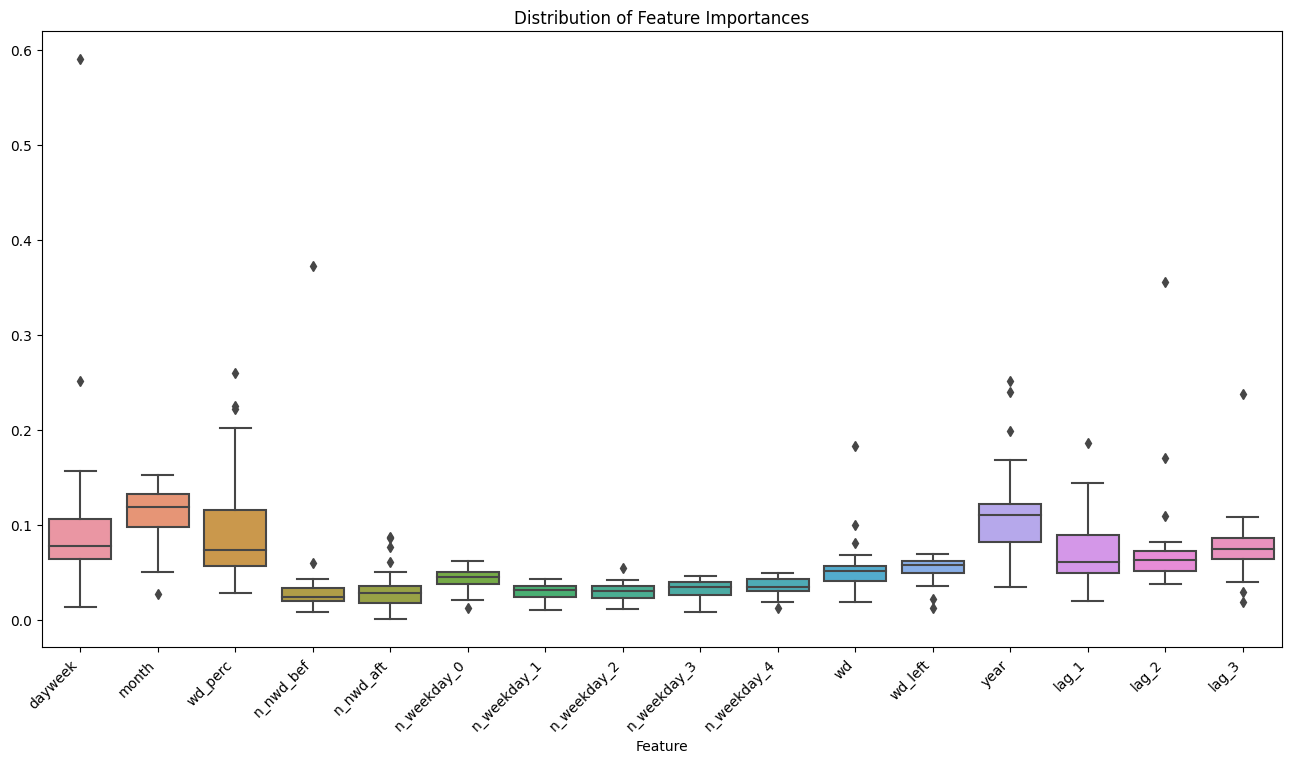

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Transpose the DataFrame using the transpose() method
transposed_df = importance_aggregate_df.transpose()

# Set the features as column names
transposed_df.columns = transposed_df.iloc[0]
transposed_df = transposed_df[1:]

# Check the new df with all the importances per feature
display(transposed_df.head())

# Plot the importance distribution of each feature
plt.figure(figsize=(16, 8))
sns.boxplot( data=transposed_df)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Feature Importances')
plt.show()